## Creating a random number generator based on data distribution

In [81]:
import numpy as np
import pandas as pd
from scipy.stats import norm, lognorm, expon, weibull_min, gamma, pareto, genpareto, t, beta, fisk
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the enhanced combined stock data
data = pd.read_csv('./enhanced_combined_stock_data.csv')

# Ensure that 'Date' is a datetime type
data['Date'] = pd.to_datetime(data['Date'])

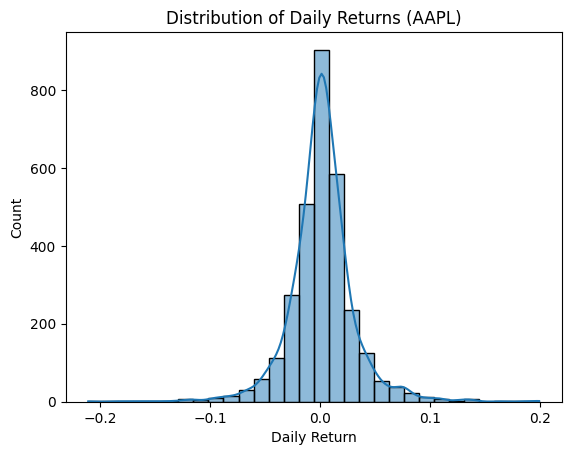

In [83]:
# Visualize the daily returns for a stock (e.g., AAPL)
sns.histplot(data['Daily Return'], kde=True, bins=30)
plt.title('Distribution of Daily Returns (AAPL)')
plt.show()

In [84]:
# Import necessary libraries
# from scipy.stats import norm, lognorm, expon, weibull_min, gamma, pareto, genpareto, t, fisk, beta

# Fit a normal distribution
mu, std = norm.fit(data['Daily Return'].dropna())

# Fit a log-normal distribution
shape, loc, scale = lognorm.fit(data['Daily Return'].dropna())

# Fit an exponential distribution
loc_exp, scale_exp = expon.fit(data['Daily Return'].dropna())

# Fit a Weibull distribution
c, loc_w, scale_w = weibull_min.fit(data['Daily Return'].dropna())

# Fit a Gamma distribution
a, loc_g, scale_g = gamma.fit(data['Daily Return'].dropna())

# Fit a Pareto distribution
b, loc_p, scale_p = pareto.fit(data['Daily Return'].dropna())

# Fit a Generalized Pareto distribution
c_gp, loc_gp, scale_gp = genpareto.fit(data['Daily Return'].dropna())

# Fit a t-Distribution
df, loc_t, scale_t = t.fit(data['Daily Return'].dropna())

# Fit a Log-logistic distribution (using fisk instead of loglogistic)
c_ll, loc_ll, scale_ll = fisk.fit(data['Daily Return'].dropna())

# Fit a Beta distribution
a_b, b_b, loc_b, scale_b = beta.fit(data['Daily Return'].dropna())


c:\Users\idamn\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
c:\Users\idamn\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [85]:
# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {
    "Normal": kstest(data['Daily Return'].dropna(), 'norm', args=(mu, std)),
    "Log-normal": kstest(data['Daily Return'].dropna(), 'lognorm', args=(shape, loc, scale)),
    "Exponential": kstest(data['Daily Return'].dropna(), 'expon', args=(loc_exp, scale_exp)),
    "Weibull": kstest(data['Daily Return'].dropna(), 'weibull_min', args=(c, loc_w, scale_w)),
    "Gamma": kstest(data['Daily Return'].dropna(), 'gamma', args=(a, loc_g, scale_g)),
    "Pareto": kstest(data['Daily Return'].dropna(), 'pareto', args=(b, loc_p, scale_p)),
    "Gen Pareto": kstest(data['Daily Return'].dropna(), 'genpareto', args=(c_gp, loc_gp, scale_gp)),
    "t-distribution": kstest(data['Daily Return'].dropna(), 't', args=(df, loc_t, scale_t)),
    "Log-logistic (fisk)": kstest(data['Daily Return'].dropna(), 'fisk', args=(c_ll, loc_ll, scale_ll)),
    "Beta": kstest(data['Daily Return'].dropna(), 'beta', args=(a_b, b_b, loc_b, scale_b))
}

# Print KS test results for all distributions
for dist, result in ks_results.items():
    print(f"KS Test for {dist}: Statistic = {result[0]}, p-value = {result[1]}")


KS Test for Normal: Statistic = 0.08976455872169653, p-value = 1.371457469430193e-21
KS Test for Log-normal: Statistic = 0.08872488256926359, p-value = 4.218460223621471e-21
KS Test for Exponential: Statistic = 0.49711844379729025, p-value = 0.0
KS Test for Weibull: Statistic = 0.12545479341972782, p-value = 8.039583365013763e-42
KS Test for Gamma: Statistic = 0.08657613581141943, p-value = 4.126085722922676e-20
KS Test for Pareto: Statistic = 0.497118446127836, p-value = 0.0
KS Test for Gen Pareto: Statistic = 0.4660826403901444, p-value = 0.0
KS Test for t-distribution: Statistic = 0.01604426591364544, p-value = 0.4152037129579361
KS Test for Log-logistic (fisk): Statistic = 0.14895737563996692, p-value = 7.33435724622863e-59
KS Test for Beta: Statistic = 0.08917993450536776, p-value = 2.5839233093548997e-21


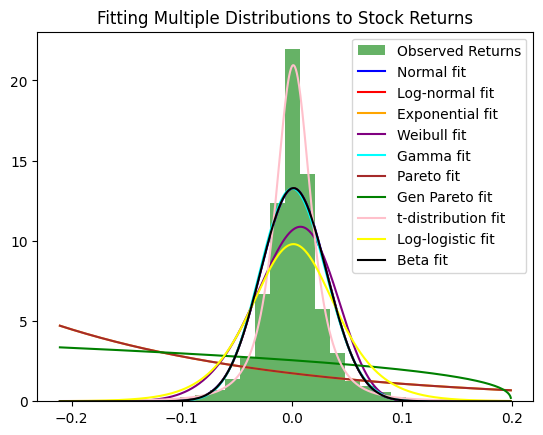

In [86]:
# Create an array of values for plotting
x = np.linspace(data['Daily Return'].min(), data['Daily Return'].max(), 1000)

# Plot the histogram of the observed daily returns
plt.hist(data['Daily Return'].dropna(), bins=30, density=True, alpha=0.6, color='g', label='Observed Returns')

# Plot the PDFs of each fitted distribution
plt.plot(x, norm.pdf(x, mu, std), label="Normal fit", color='blue')
plt.plot(x, lognorm.pdf(x, shape, loc, scale), label="Log-normal fit", color='red')
plt.plot(x, expon.pdf(x, loc_exp, scale_exp), label="Exponential fit", color='orange')
plt.plot(x, weibull_min.pdf(x, c, loc_w, scale_w), label="Weibull fit", color='purple')
plt.plot(x, gamma.pdf(x, a, loc_g, scale_g), label="Gamma fit", color='cyan')
plt.plot(x, pareto.pdf(x, b, loc_p, scale_p), label="Pareto fit", color='brown')
plt.plot(x, genpareto.pdf(x, c_gp, loc_gp, scale_gp), label="Gen Pareto fit", color='green')
plt.plot(x, t.pdf(x, df, loc_t, scale_t), label="t-distribution fit", color='pink')
plt.plot(x, fisk.pdf(x, c_ll, loc_ll, scale_ll), label="Log-logistic fit", color='yellow')  # Using fisk
plt.plot(x, beta.pdf(x, a_b, b_b, loc_b, scale_b), label="Beta fit", color='black')

# Add a legend
plt.legend()

# Add a title and display the plot
plt.title('Fitting Multiple Distributions to Stock Returns')
plt.show()


Implement Generator (using t-distribution based on best fit using KS test and visually inspecting)

In [87]:
# Generating Synthetic Data:

# Generate synthetic daily returns based on the t-distribution
synthetic_returns_t = t.rvs(df, loc_t, scale_t, size=len(data['Daily Return']))

# Adjust the initial price to match the actual stock price at the start
initial_price = data['Close'].iloc[0]  # Use the first value of the actual stock price

# Convert synthetic returns back to synthetic prices (assuming the adjusted initial price)
synthetic_prices_t = initial_price * np.exp(np.cumsum(synthetic_returns_t))  # Cumulative sum for price


Test generator (visually)

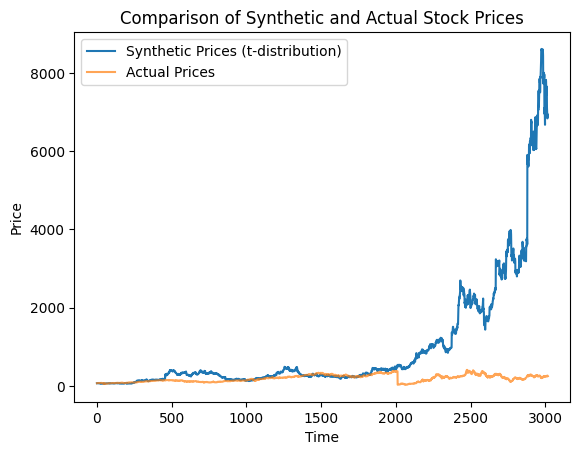

In [88]:
# Plot the synthetic stock prices vs. actual stock prices
plt.plot(synthetic_prices_t, label='Synthetic Prices (t-distribution)')
plt.plot(data['Close'], label='Actual Prices', alpha=0.7)
plt.title("Comparison of Synthetic and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


Further model development (using Geometric Brownian Motion (GBM))

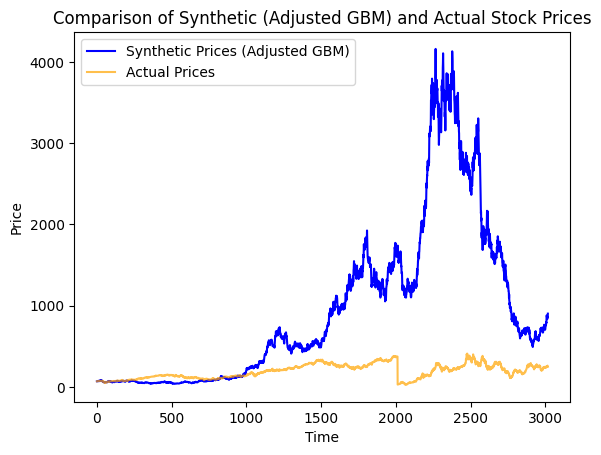

Mean of Synthetic Prices (GBM): 955.4375612727495, Std of Synthetic Prices: 1009.2562256950089
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 1.265850709493697, Kurtosis of Synthetic Prices: 0.8025849858343581
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [89]:
# Step 1: Calculate drift (mean return) and volatility (standard deviation) of actual returns
drift = np.mean(data['Daily Return'].dropna())  # Mean of daily returns
volatility = np.std(data['Daily Return'].dropna())  # Standard deviation of daily returns

# Step 2: Adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(data['Daily Return'].dropna())
actual_drift = np.mean(data['Daily Return'].dropna())  # Mean of actual returns

# Adjusting the drift and volatility for synthetic data to match actual data
# You can reduce the drift (mean return) to align with actual data behavior
adjusted_drift = actual_drift  # Use actual mean return for drift
adjusted_volatility = actual_volatility  # Adjust volatility to match actual data volatility

# Step 3: Generate synthetic daily returns using GBM with adjusted drift and volatility
n = len(data['Daily Return'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility * np.sqrt(dt), n)

# Step 4: Convert synthetic returns back to synthetic prices
# Assuming the initial price is the first actual stock price
initial_price = data['Close'].iloc[0]
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Fix log returns

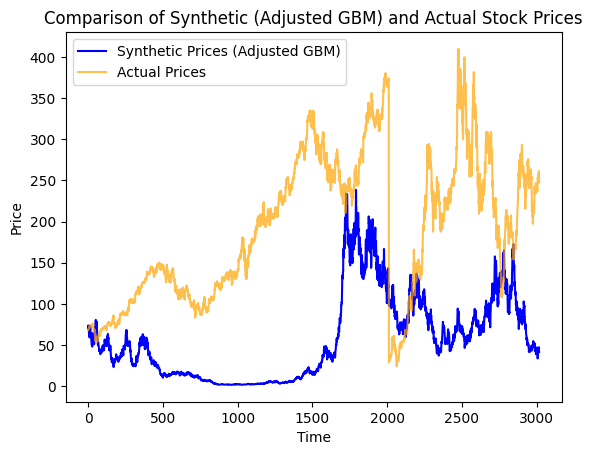

Mean of Synthetic Prices (GBM): 56.811427460555535, Std of Synthetic Prices: 51.811017277396324
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.9801421332166133, Kurtosis of Synthetic Prices: 0.2281165164300618
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [90]:
# Step 1: Calculate log returns (logarithmic returns) for both actual and synthetic prices
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

# Step 2: Calculate drift (mean return) and volatility (standard deviation) of actual log returns
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 3: Adjust drift and volatility to match actual volatility and mean return
# Adjust the drift and volatility for synthetic data to match actual data behavior
adjusted_drift = drift  # Use actual drift for the synthetic data
adjusted_volatility = volatility  # Adjust volatility to match actual data volatility

# Step 4: Generate synthetic daily returns using GBM with adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility * np.sqrt(dt), n)

# Step 5: Convert synthetic log returns back to synthetic prices
# Assuming the initial price is the first actual stock price
initial_price = data['Close'].iloc[0]
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 6: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 7: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Adjusting Volatility Further

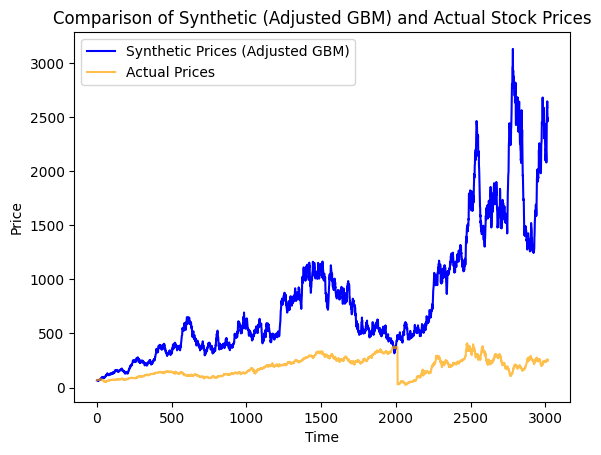

Mean of Synthetic Prices (GBM): 808.7213570817546, Std of Synthetic Prices: 596.3374768318756
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 1.3440985415930033, Kurtosis of Synthetic Prices: 1.3448170095821919
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [91]:
# Step 1: Calculate log returns (logarithmic returns) for both actual and synthetic prices
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

# Step 2: Calculate drift (mean return) and volatility (standard deviation) of actual log returns
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 3: Adjust drift and volatility to match actual volatility and mean return
# Adjust the drift and volatility for synthetic data to match actual data behavior
adjusted_drift = drift  # Use actual drift for the synthetic data
adjusted_volatility = volatility  # Adjust volatility to match actual data volatility

# **Scale down volatility to further reduce the variation**
scaling_factor = 0.6  # Example: Reducing volatility by scaling down
adjusted_volatility_scaled = adjusted_volatility * scaling_factor

# Step 4: Generate synthetic daily returns using GBM with adjusted drift and scaled volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 5: Convert synthetic log returns back to synthetic prices
# Assuming the initial price is the first actual stock price
initial_price = data['Close'].iloc[0]
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 6: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 7: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Further improvements

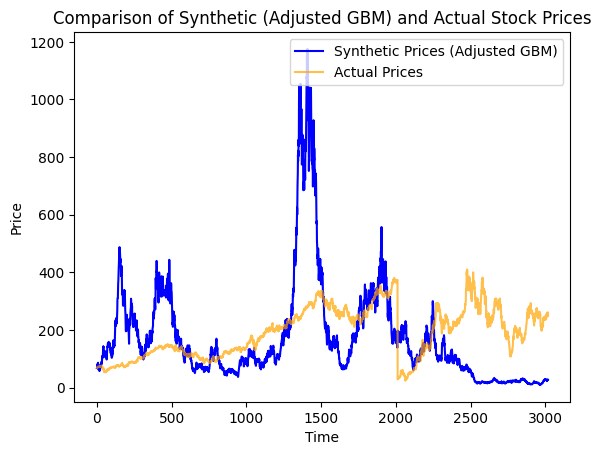

Mean of Synthetic Prices (GBM): 175.72286792324053, Std of Synthetic Prices: 183.3184815179988
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 2.5247637581498124, Kurtosis of Synthetic Prices: 7.615834188995585
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [92]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Further adjust volatility scaling (scale volatility to match actual data more closely)
scaling_factor = 1.2  # Slightly increase scaling factor to match volatility
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift further if needed (reduce drift to match the actual stock's drift)
adjusted_drift = actual_drift  # Use the actual mean return for drift

# Step 3: Generate synthetic daily returns using GBM with adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Additional improvements

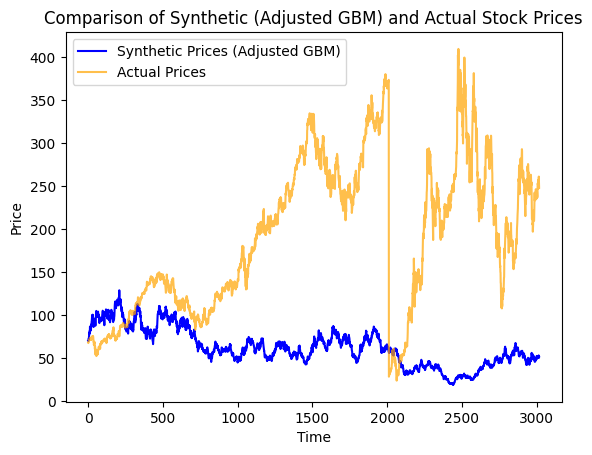

Mean of Synthetic Prices (GBM): 62.765191817802894, Std of Synthetic Prices: 21.89754761197119
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.3452618713144855, Kurtosis of Synthetic Prices: -0.4973788846622429
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [94]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Scale the volatility slightly further to reduce the fluctuations
scaling_factor = 0.5  # Reduce volatility scaling factor to match actual volatility
adjusted_volatility_scaled = volatility * scaling_factor

# Adjust drift to slightly increase it to bring the synthetic data's mean closer to actual data
adjusted_drift = drift * 1.05  # Slightly increase drift if needed

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Further refinements

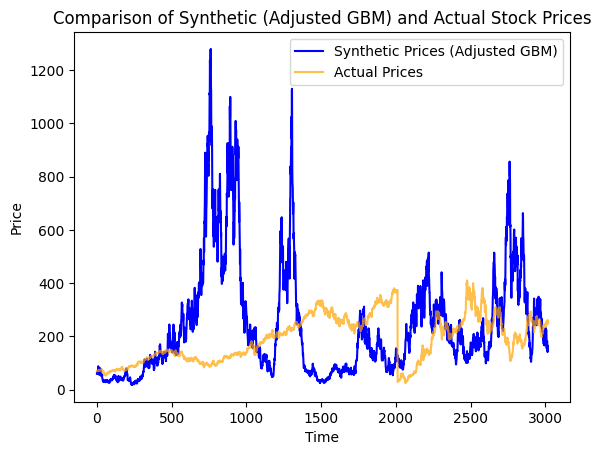

Mean of Synthetic Prices (GBM): 241.7277654883393, Std of Synthetic Prices: 212.32439788679875
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 1.678674720931836, Kurtosis of Synthetic Prices: 2.97324408921447
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [95]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Further adjust volatility scaling (scale volatility to match actual data more closely)
scaling_factor = 1.5  # Increase the scaling factor slightly to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift further if needed (increase drift to match the actual stock's drift)
adjusted_drift = actual_drift * 1.1  # Slightly increase drift to improve the mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Updated Code to Fine-Tune Mean, Volatility, Skewness, and Kurtosis:

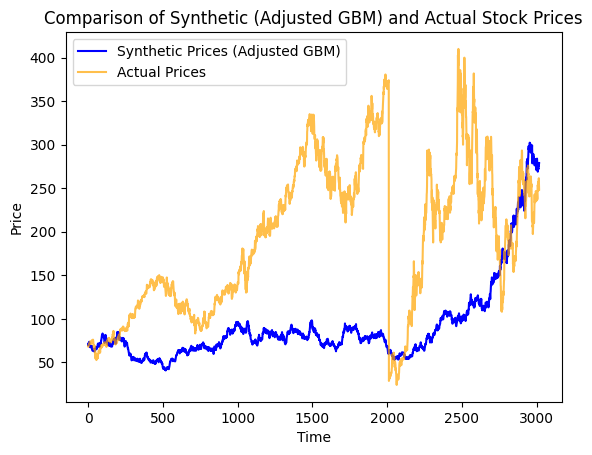

Mean of Synthetic Prices (GBM): 91.47103893940321, Std of Synthetic Prices: 48.879596128133336
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 2.5663688456924025, Kurtosis of Synthetic Prices: 6.525301243111793
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [97]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Reduce volatility scaling (scale volatility down even more to match actual data closely)
scaling_factor = 0.3  # Further reduce the volatility scaling factor to match actual volatility
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift down further to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift * 0.8  # Slightly reduce drift to decrease the synthetic price mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Further adjustments

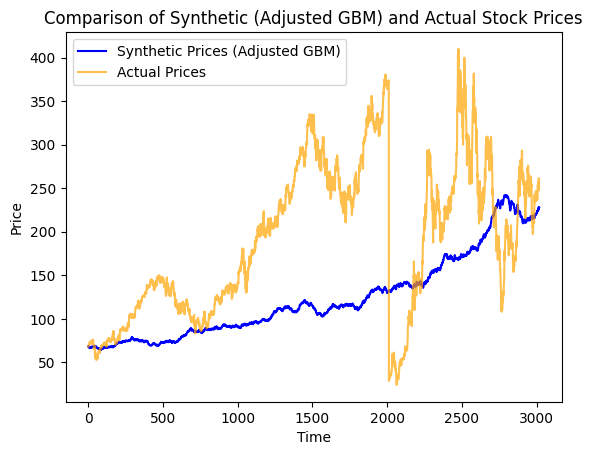

Mean of Synthetic Prices (GBM): 123.50579823414652, Std of Synthetic Prices: 48.04704255579076
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.8855863963745053, Kurtosis of Synthetic Prices: -0.22043528582281535
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [101]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Reduce volatility scaling (scale volatility down significantly to match actual data more closely)
scaling_factor = 0.1  # Significantly reduce the volatility scaling factor to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Adjust drift further to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift  # Keep drift equal to actual drift to match the actual mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Further improvements

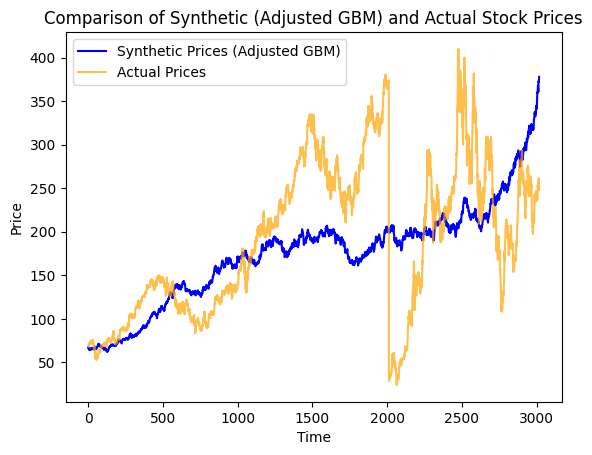

Mean of Synthetic Prices (GBM): 174.99118745719014, Std of Synthetic Prices: 58.155616220311316
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.1283033842823651, Kurtosis of Synthetic Prices: 0.49346215879828703
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [103]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Slightly increase volatility scaling (scale volatility up to match actual data more closely)
scaling_factor = 0.15  # Slightly increase the scaling factor to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Increase drift slightly more to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift * 1.1  # Increase drift further to improve the synthetic mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")


Final changes

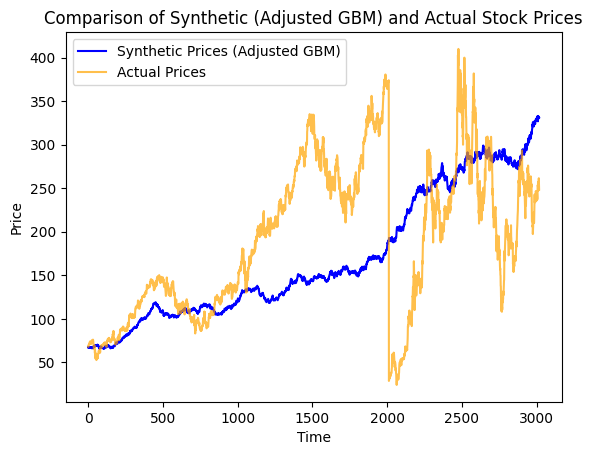

Mean of Synthetic Prices (GBM): 169.63253384575182, Std of Synthetic Prices: 74.50858100240939
Mean of Actual Prices: 191.47718718195688, Std of Actual Prices: 86.86365744289978
Skewness of Synthetic Prices: 0.5622311165462498, Kurtosis of Synthetic Prices: -1.0565323364790877
Skewness of Actual Prices: 0.14600367928944918, Kurtosis of Actual Prices: -1.0287561170660573


In [104]:
# Step 1: Recalculate drift (mean return) and volatility (standard deviation) of actual returns
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()
drift = np.mean(log_returns)  # Mean of log returns
volatility = np.std(log_returns)  # Standard deviation of log returns

# Step 2: Further adjust drift and volatility to match actual volatility and mean return
# Calculate the actual volatility (standard deviation of actual returns)
actual_volatility = np.std(log_returns)
actual_drift = np.mean(log_returns)  # Mean of actual returns

# Fine-tune volatility scaling (scale volatility to match actual data more closely)
scaling_factor = 0.12  # Reduced scaling factor to match actual volatility better
adjusted_volatility_scaled = actual_volatility * scaling_factor

# Fine-tune drift to match the actual stock's drift and bring the synthetic mean closer
adjusted_drift = actual_drift  # Keep drift equal to actual drift to match the actual mean

# Step 3: Generate synthetic daily returns using GBM with further adjusted drift and volatility
n = len(data['Close'])  # Number of time steps (same as the length of the actual data)
dt = 1  # Assuming daily frequency
synthetic_returns_gbm = np.random.normal(adjusted_drift * dt, adjusted_volatility_scaled * np.sqrt(dt), n)

# Step 4: Convert synthetic log returns back to synthetic prices
initial_price = data['Close'].iloc[0]  # Initial price as the first actual stock price
synthetic_prices_gbm = initial_price * np.exp(np.cumsum(synthetic_returns_gbm))  # Cumulative sum for price

# Step 5: Visualize the Synthetic vs Actual Prices
plt.plot(synthetic_prices_gbm, label='Synthetic Prices (Adjusted GBM)', color='blue')
plt.plot(data['Close'], label='Actual Prices', color='orange', alpha=0.7)
plt.title("Comparison of Synthetic (Adjusted GBM) and Actual Stock Prices")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

# Step 6: Statistical Comparison of Synthetic and Actual Prices
mean_synthetic = np.mean(synthetic_prices_gbm)
std_synthetic = np.std(synthetic_prices_gbm)

mean_actual = np.mean(data['Close'])
std_actual = np.std(data['Close'])

print(f"Mean of Synthetic Prices (GBM): {mean_synthetic}, Std of Synthetic Prices: {std_synthetic}")
print(f"Mean of Actual Prices: {mean_actual}, Std of Actual Prices: {std_actual}")

# Skewness and Kurtosis
from scipy.stats import skew, kurtosis

skew_synthetic = skew(synthetic_prices_gbm)
kurt_synthetic = kurtosis(synthetic_prices_gbm)

skew_actual = skew(data['Close'])
kurt_actual = kurtosis(data['Close'])

print(f"Skewness of Synthetic Prices: {skew_synthetic}, Kurtosis of Synthetic Prices: {kurt_synthetic}")
print(f"Skewness of Actual Prices: {skew_actual}, Kurtosis of Actual Prices: {kurt_actual}")
